### Model considering both drivers and constructors

### train model to  predict finishing  position of driver using driver, constructor ,grid position and circuit name

In [100]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your machine learning code here

# Reset warning filters (optional)
warnings.resetwarnings()


In [ ]:
data1=pd.read_csv('dataframe.csv')

In [101]:
x= data1[['GP_name','quali_pos','driver','age_at_gp_in_days','driver_confidence','active_driver','position','constructor_relaiblity','active_constructor']]
# x_c = data[['GP_name','quali_pos','constructor','position','constructor_relaiblity','active_constructor']]

In [102]:
x= x[x['active_constructor']==1]
x= x[x['active_driver']==1]

In [103]:
cleaned_data = data1[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_relaiblity','active_driver','active_constructor','dob']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('cleaned_data.csv',index=False)

In [104]:
data1['position'] = data1['position'].astype(int)
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [105]:
X = data1.drop(['position','active_driver','active_constructor','driver_nationality',"constructor_nationality",'country','year','date','status_id','dob','age_at_gp_in_days','driver_home','constructor_home','driver_dnf','constructor_dnf'],axis=1)

y = data1['position'].apply(lambda x: position_index(x))

In [106]:
#cross validation for diffrent models
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])

/Users/tusharpatil/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tusharpatil/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [107]:
for model in models:
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.8975194594132236
DecisionTreeClassifier : 0.8975194594132236
RandomForestClassifier : 0.8975194594132236
SVC : 0.8975194594132236
GaussianNB : 0.8975194594132236
KNeighborsClassifier : 0.8975194594132236


In [108]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your feature matrix and target values
# X should be a numpy array or pandas DataFrame, and y should be a numpy array or pandas Series

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier()

# Fit the model on the entire dataset
rfc.fit(X, y)

RandomForestClassifier()

In [109]:
# Prepare new data as a DataFrame
new_data = pd.DataFrame({
    'quali_pos': [18],
    'constructor': [13],
    'GP_name': [0],
    'driver': [43],
    'driver_confidence': [0.800000],
    'constructor_relaiblity': [0.530151],
    
})
# 	quali_pos 	constructor 	GP_name 	driver 	driver_confidence 	constructor_relaiblity
prediction=rfc.predict(new_data)
prediction

array([3])

In [110]:
import pickle

# # Train your model
# model = ...

# Save the model to a file using pickle
with open('raoforest.pkl', 'wb') as model_file:
    pickle.dump(rfc, model_file)

In [111]:
# Load the model from the file using pickle
with open('raoforest.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use the loaded model for predictions
predictions = loaded_model.predict(new_data)
predictions

array([3])

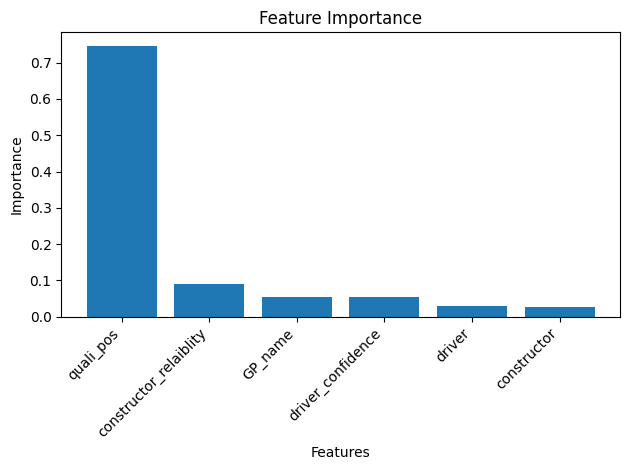

In [154]:
# Feature names (replace with your actual feature names)
feature_names = ['quali_pos', 'constructor', 'GP_name', 'driver', 'driver_confidence','constructor_relaiblity']



# Get feature importances
feature_importances = rfc.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Create bar chart with feature names as x-axis labels
plt.bar(sorted_features, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()  # Adjust layout for better readability
plt.show()


